In [1]:
from utils import Dataset, init_notebook
init_notebook()
ds = Dataset.from_sheets()
ds.fix_intestine()

Długość jelita cieńkiego (cm) female: mean=100.90, std=20.08, cv=0.18
Długość jelita cieńkiego (cm) male: mean=104.72, std=12.00, cv=0.11
t-test Długość jelita cieńkiego (cm) by gender: pvalue=0.66
Saving plot to 'images/Długość jelita cieńkiego (cm) by gender.png'


<Axes: xlabel='Płeć', ylabel='Długość jelita cieńkiego (cm)'>

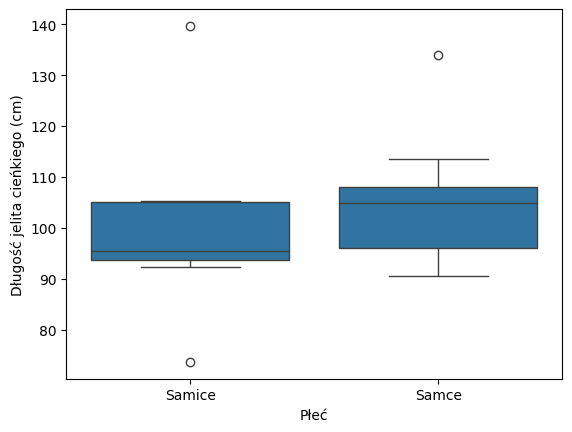

In [2]:
ds.compare_by_gender(x="Długość jelita cieńkiego (cm)")

Długość jelita grubego (cm) female: mean=6.80, std=1.71, cv=0.23
Długość jelita grubego (cm) male: mean=5.72, std=1.52, cv=0.25
t-test Długość jelita grubego (cm) by gender: pvalue=0.20
Saving plot to 'images/Długość jelita grubego (cm) by gender.png'


<Axes: xlabel='Płeć', ylabel='Długość jelita grubego (cm)'>

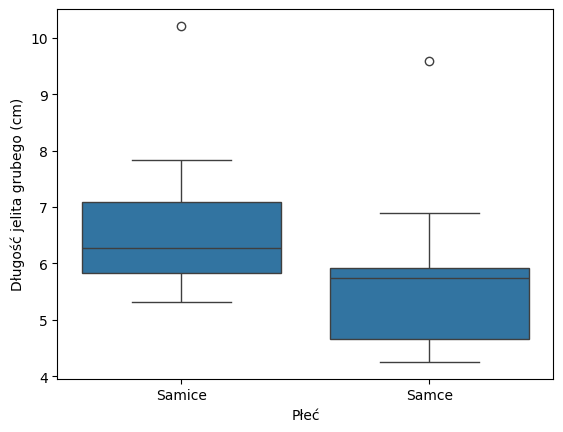

In [3]:
ds.compare_by_gender(x="Długość jelita grubego (cm)")

Całkowita długość jelit (cm) female: mean=107.70, std=21.52, cv=0.18
Całkowita długość jelit (cm) male: mean=110.44, std=11.99, cv=0.10
t-test Całkowita długość jelit (cm) by gender: pvalue=0.77
Saving plot to 'images/Całkowita długość jelit (cm) by gender.png'


<Axes: xlabel='Płeć', ylabel='Całkowita długość jelit (cm)'>

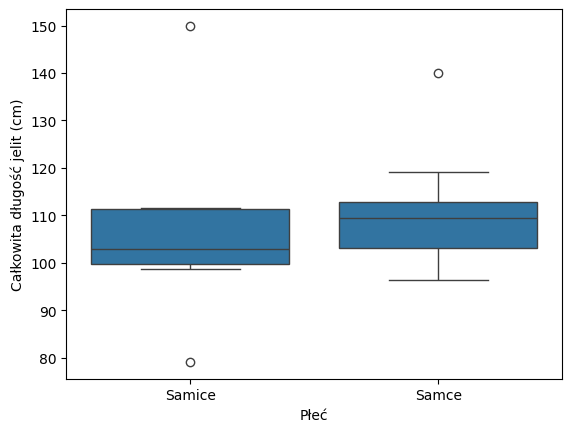

In [4]:
ds.compare_by_gender(x="Całkowita długość jelit (cm)")

<Axes: xlabel='Całkowita długość jelit (cm)', ylabel='Count'>

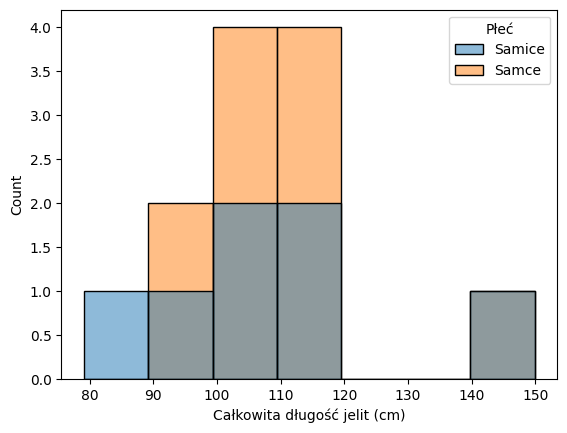

In [5]:
ds.histogram(x="Całkowita długość jelit (cm)", hue="Płeć")

Masa ciała (g): mean=313.74, std=77.59
	F
Całkowita długość jelit (cm): mean=109.38, std=15.81
	F
r^2=0.41, pvalue=0.09
    F r^2=0.70, pvalue=0.08
    M r^2=-0.07, pvalue=0.84


<Axes: xlabel='Masa ciała (g)', ylabel='Całkowita długość jelit (cm)'>

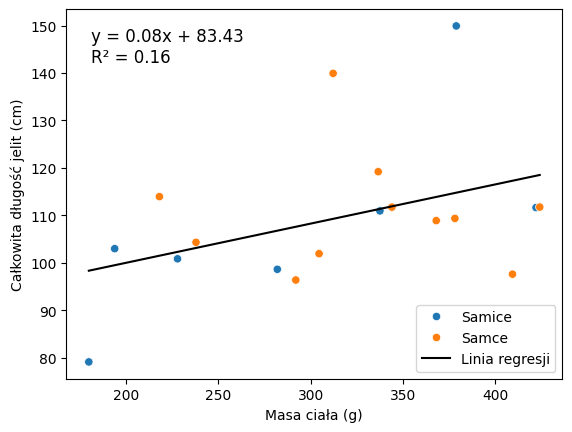

In [6]:
ds.corr_body_mass(y="Całkowita długość jelit (cm)", hue="Płeć")

Stosunek C/G female: mean=15.08, std=2.16, cv=0.13
Stosunek C/G male: mean=19.24, std=4.28, cv=0.21
t-test Stosunek C/G by gender: pvalue=0.02
Saving plot to 'images/Stosunek C_G by gender.png'


<Axes: xlabel='Płeć', ylabel='Stosunek C/G'>

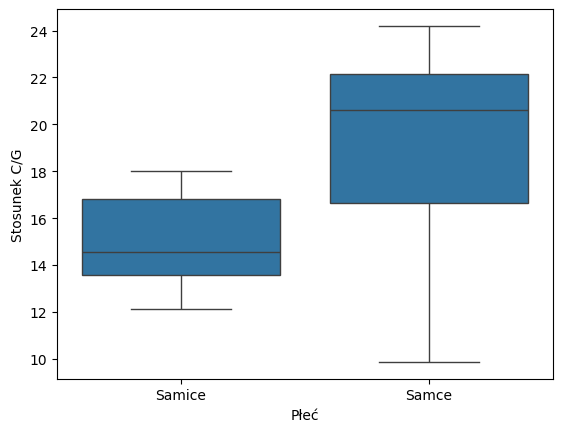

In [7]:
ds.compare_by_gender(x="Stosunek C/G")

# Old

In [8]:
df = pd.read_excel("./daria_computer_readable.xlsx")
df["Jelito Cienkie"] = df["Długość dwunastnicy "] + df["Długość jelita czczego "] + df["Długość jelita biodrowego  "]
df["Jelito Grube"] = ((df["Długość jelita ślepiego P"].replace("BRAK", pd.NA) + df["Długość jelita ślepiego P"]) / 2) + df["Okrężnica z odbytnicą "]

NameError: name 'pd' is not defined

In [ ]:
sns.histplot(data=df, x="Jelito Cienkie", hue="Płeć", stat="count", bins=10)

In [ ]:
sns.histplot(data=df, x="Jelito Grube", hue="Płeć", stat="count", bins=10)

In [ ]:
df["C/G Ratio"] = df["Jelito Cienkie"] / df["Jelito Grube"]
sns.histplot(data=df, x="C/G Ratio", hue="Płeć", stat="count", bins=10)

In [ ]:
sns.boxplot(x="Płeć", y="C/G Ratio", data=df)

In [ ]:
f = df["C/G Ratio"][df["Płeć"] == "W"].dropna().astype(float)
m = df["C/G Ratio"][df["Płeć"] == "M"].dropna().astype(float)

In [ ]:
f.mean(), m.mean()

In [ ]:
f.std(), m.std()

In [ ]:
stats.shapiro(f), stats.shapiro(m)

In [ ]:
stats.mannwhitneyu(f, m)

In [ ]:
df["Długość jelit"] = df["Jelito Cienkie"] + df["Jelito Grube"]
df["Długość jelit"] = df["Długość jelit"].replace("BRAK", pd.NA).dropna().astype(float)
sns.histplot(data=df, x="Długość jelit", hue="Płeć", stat="count", bins=10)

In [ ]:
sns.boxplot(x="Płeć", y="Długość jelit", data=df)

In [ ]:
sns.jointplot(x="Długość jelit", y="Masa ciała (kg)", data=df, kind='reg')

In [ ]:
sns.jointplot(x="Długość jelit", y="Masa ciała (kg)", data=df, hue="Płeć")